# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [37]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


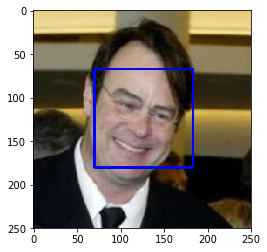

In [38]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [39]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
Answer is printed below

In [40]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
num_human_detected = 0.0
num_dog_detected = 0.0

num_files = len(human_files_short)

for i in range(0, num_files):
    human = human_files_short[i]
    dog = dog_files_short[i]
    
    if face_detector(human) == True:
        num_human_detected += 1
    if face_detector(dog) == True:
        num_dog_detected += 1
        
print('Percentage of Humans detected in 100 human_files images:{0:.0%}'.format(num_human_detected / num_files))
print('Percentage of Humans detected in 100 dogs_files images:{0:.0%}'.format(num_dog_detected / num_files))


Percentage of Humans detected in 100 human_files images:98%
Percentage of Humans detected in 100 dogs_files images:17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [41]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [42]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [43]:
from PIL import Image, ImageFile
import torchvision.transforms as transforms
from torch.autograd import Variable
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    image = Image.open(img_path).convert('RGB')
    ## Return the *index* of the predicted class for that image
    ## Normalize Data
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])
    ## Apply Transformation
    image = data_transform(image)
    
    ## Insert the new axis at index 0 i.e. in front of the other axes/dims.
    image = image.unsqueeze(0)
    
    ## PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    ## wrapper around a PyTorch Tensor.
    
    image = Variable(image)
    if use_cuda:
        image = image.cuda()
    ## Returns a Tensor of shape (batch, num class labels)
    prediction = VGG16(image)
    prediction = prediction.data.argmax()
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [44]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = VGG16_predict(img_path)
    
    if class_index >=151 and class_index <= 268: 
        return True # true/false
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ Answer is printed below


In [45]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
num_human_detected = 0.0
num_dog_detected = 0.0
num_files = len(human_files_short)

for i in range(0, num_files):
    human = human_files_short[i]
    dog = dog_files_short[i]
    
    if dog_detector(human) == True:
        num_human_detected += 1
    if dog_detector(dog) == True:
        num_dog_detected += 1
        
print('Percentage of Humans detected in 100 human_files images:{0:.0%}'.format(num_human_detected / num_files))
print('Percentage of Humans detected in 100 dogs_files images:{0:.0%}'.format(num_dog_detected / num_files))

Percentage of Humans detected in 100 human_files images:1%
Percentage of Humans detected in 100 dogs_files images:100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [46]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [47]:
import os
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision import utils
import torch

use_cuda = torch.cuda.is_available()
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Resize the Image, then convert to tensor
# Normalize images
transforms = {
    # Use RandomHorizontalFlip() to add data in the train transformation
    'train' : transforms.Compose([transforms.Resize(256),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'valid' : transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'test' : transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
}

# Number of subprocesses, if it's 0, it uses the main process.
num_workers = 0
# How many samples will be loaded for one batch?
batch_size = 20

# Create image datasets (train, valid, test)
image_datasets = {x: datasets.ImageFolder(os.path.join('/data/dog_images', x), transforms[x])
                 for x in ['train', 'valid', 'test']}

# Create data loaders (train, valid, test)
data_loaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers)
               for x in ['train', 'valid', 'test']}

# Decrease batch size because of the out of memory in the GPU Instance
test_loader = torch.utils.data.DataLoader(image_datasets['test'], shuffle=True,
                                         batch_size=15)


# Check the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}

print('Number of records of training dataset: {}'.format(dataset_sizes['train']))
print('Number of records of validation dataset: {}'.format(dataset_sizes['valid']))
print('Number of records of test dataset: {}'.format(dataset_sizes['test']))

# Get the all the breed labels
class_names = image_datasets['train'].classes
# Get the number of classes
n_classes = len(class_names)
print('Number of classes: {}'.format(n_classes))

Number of records of training dataset: 6680
Number of records of validation dataset: 835
Number of records of test dataset: 836
Number of classes: 133


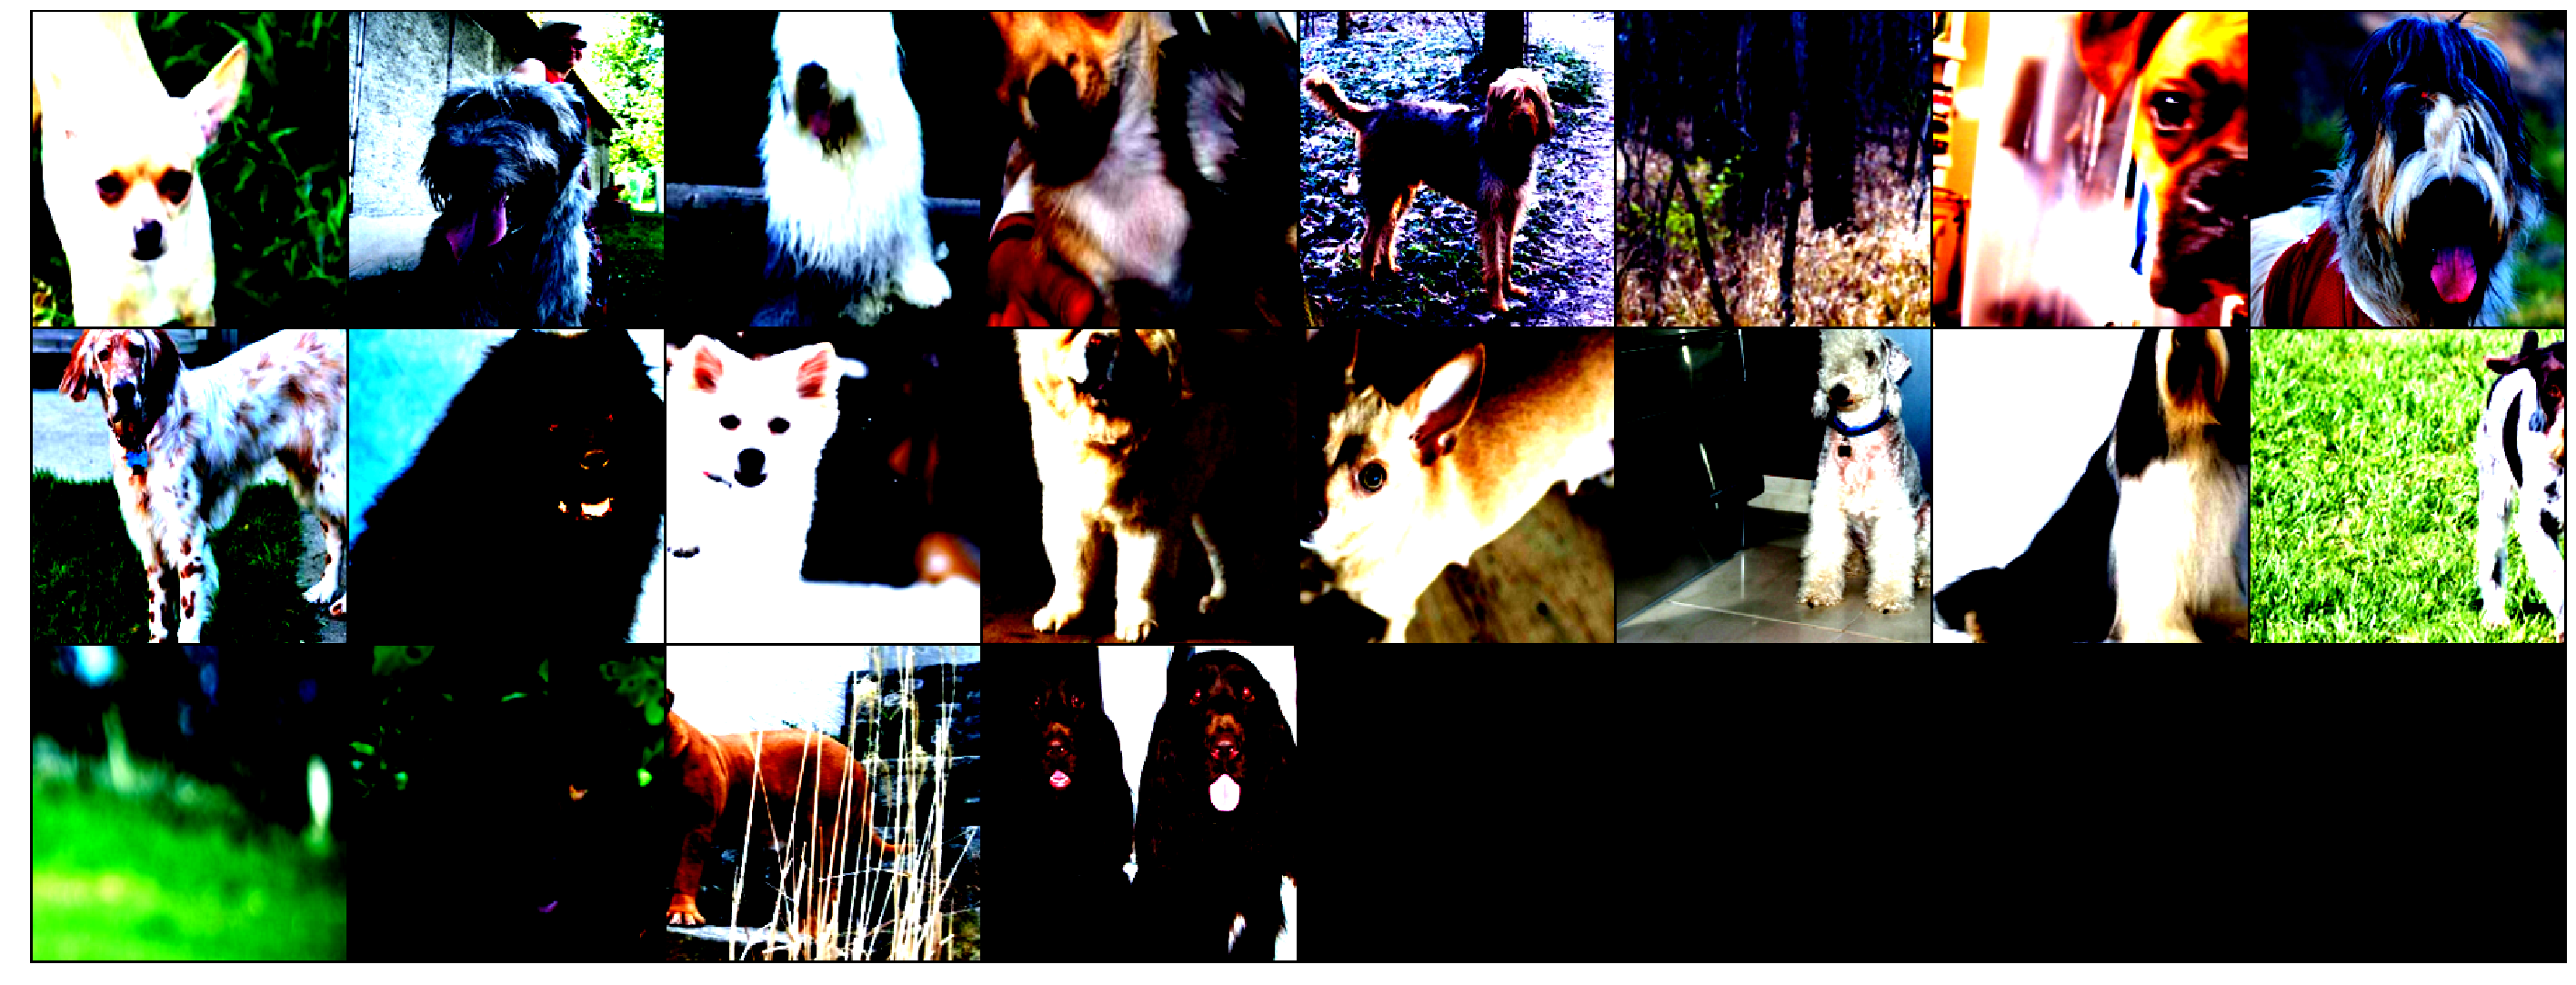

In [48]:
# Visualize data
import numpy as np
import matplotlib.pyplot as plt                        

def visualize_sample_images(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    
    fig = plt.figure(figsize=(50, 25))
    plt.axis('off')
    plt.imshow(inp)
    plt.pause(0.001)
    
# Get a batch of training data.    
inputs, classes = next(iter(data_loaders['train']))

# Convert the batch to a grid.
grid = utils.make_grid(inputs)

# Display images
visualize_sample_images(grid)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Resized each image using transforms.Resize() and add data in training set using transforms.RandomHorizontalFlip()

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Follow the architecture of VGG-16
        # Size 224
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        # Size 112
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        # Size 56
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        # Size 28
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        # Size 14
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        
        # Batch Normalization is a technique to improve performance and stability
        # of an artifical neural network.
        # It provides zero mean and unit variance as inputs to any layers.
        self.batch_norm64 = nn.BatchNorm2d(64)
        self.batch_norm128 = nn.BatchNorm2d(128)
        self.batch_norm256 = nn.BatchNorm2d(256)
        self.batch_norm512 = nn.BatchNorm2d(512)
        
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout()
        
        # Size 7
        self.fc1 = nn.Linear(512 * 7 * 7, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        # The Last fully connected layer's output is 133(Number of breeds)
        self.fc3 = nn.Linear(4096, 1000)
        self.fc4 = nn.Linear(1000,133)
        
    def forward(self, x):
        x = self.relu(self.batch_norm64(self.conv1_1(x)))
        x = self.relu(self.batch_norm64(self.conv1_2(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm128(self.conv2_1(x)))
        x = self.relu(self.batch_norm128(self.conv2_2(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm256(self.conv3_1(x)))
        x = self.relu(self.batch_norm256(self.conv3_2(x)))
        x = self.relu(self.batch_norm256(self.conv3_3(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm512(self.conv4_1(x)))
        x = self.relu(self.batch_norm512(self.conv4_2(x)))
        x = self.relu(self.batch_norm512(self.conv4_3(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm512(self.conv5_1(x)))
        x = self.relu(self.batch_norm512(self.conv5_2(x)))
        x = self.relu(self.batch_norm512(self.conv5_3(x)))
        x = self.max_pool(x)
        
        # It returns a new tensor which has a different size
        # and it's the same data of self tensor
        # The -1 means inferring the size from other dimensions.
        x = x.view(x.size(0), -1)
        
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ As mentioned above vgg16 is a very large, very popular dataset used for image classification and other vision tasks. ImageNet contains over 10 million URLs, each linking to an image containing an object from one of 1000 categories. So I tried to replicate the architecture from here https://neurohive.io/en/popular-networks/vgg16/, and added an extra fcc layer at the end.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [22]:
def train(n_epochs, train_loader, valid_loader,
          model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # parameter update
            optimizer.step()
            # update training loss
            train_loss += loss.item() * data.size(0)
            
        ######################
        # validate the model #
        ######################
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            # batch loss
            loss = criterion(output, target)
            # update validation loss
            valid_loss += loss.item() * data.size(0)
        
        # calculate average losses
        train_loss = train_loss / len(train_loader.dataset)
        valid_loss = valid_loss / len(valid_loader.dataset)
        
        # print training/validation statistics 
        print('Epoch: {}\tTraining Loss: {:.6f}\t Validation Loss: {:.6f}'.
             format(epoch, train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).    Saving model...'.
                 format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    
    # return trained model
    return model

n_epochs = 10
# train the model
model_scratch = train(n_epochs, data_loaders['train'], data_loaders['valid'], model_scratch,
                     optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1	Training Loss: 4.887028	 Validation Loss: 4.870933
Validation loss decreased (inf --> 4.870933).    Saving model...
Epoch: 2	Training Loss: 4.846209	 Validation Loss: 4.800840
Validation loss decreased (4.870933 --> 4.800840).    Saving model...
Epoch: 3	Training Loss: 4.785581	 Validation Loss: 4.729260
Validation loss decreased (4.800840 --> 4.729260).    Saving model...
Epoch: 4	Training Loss: 4.701610	 Validation Loss: 4.606321
Validation loss decreased (4.729260 --> 4.606321).    Saving model...
Epoch: 5	Training Loss: 4.619852	 Validation Loss: 4.532579
Validation loss decreased (4.606321 --> 4.532579).    Saving model...
Epoch: 6	Training Loss: 4.568565	 Validation Loss: 4.445508
Validation loss decreased (4.532579 --> 4.445508).    Saving model...
Epoch: 7	Training Loss: 4.506544	 Validation Loss: 4.354985
Validation loss decreased (4.445508 --> 4.354985).    Saving model...
Epoch: 8	Training Loss: 4.434876	 Validation Loss: 4.267199
Validation loss decreased (4.354985

In [27]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
model_scratch = train(n_epochs, data_loaders['train'], data_loaders['valid'], model_scratch,
                     optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1	Training Loss: 4.168967	 Validation Loss: 3.993777
Validation loss decreased (inf --> 3.993777).    Saving model...
Epoch: 2	Training Loss: 4.116333	 Validation Loss: 3.999526
Epoch: 3	Training Loss: 4.073866	 Validation Loss: 3.938592
Validation loss decreased (3.993777 --> 3.938592).    Saving model...
Epoch: 4	Training Loss: 4.035053	 Validation Loss: 3.834942
Validation loss decreased (3.938592 --> 3.834942).    Saving model...
Epoch: 5	Training Loss: 3.979694	 Validation Loss: 3.817304
Validation loss decreased (3.834942 --> 3.817304).    Saving model...
Epoch: 6	Training Loss: 3.950027	 Validation Loss: 3.835704
Epoch: 7	Training Loss: 3.906579	 Validation Loss: 3.799666
Validation loss decreased (3.817304 --> 3.799666).    Saving model...
Epoch: 8	Training Loss: 3.865107	 Validation Loss: 3.643633
Validation loss decreased (3.799666 --> 3.643633).    Saving model...
Epoch: 9	Training Loss: 3.833566	 Validation Loss: 3.678342
Epoch: 10	Training Loss: 3.781092	 Validation

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [28]:
def test(loader, model, criterion, use_cuda):
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    for batch_idx, (data, target) in enumerate(loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
            
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
    print('Test Loss: {:.6f}\n'.format(test_loss))
    
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

# call test function 
test(test_loader, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.605551


Test Accuracy: 11% (97/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [29]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [30]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# Load VGG-16 model
model_transfer = models.vgg16(pretrained=True)

# Freeze the pre-trained weights
for param in model_transfer.features.parameters():
    param.required_grad = False
    
# Get the input of the last layer of VGG-16
n_inputs = model_transfer.classifier[6].in_features

# Create a new layer(n_inputs -> 133)
# The new layer's requires_grad will be automatically True.
last_layer = nn.Linear(n_inputs, 133)

# Change the last layer to the new layer.
model_transfer.classifier[6] = last_layer

# Print the model.
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 103605088.73it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I have used vgg16 pre-trained model from torch vision and added an extra fully connected layer at the end by taking the output from the last layer of the trained model as input. I have also used the vgg16 architecture fot training my model from scratch and wanted to compare the result


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [31]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [32]:
# train the model
model_transfer = train(n_epochs, data_loaders['train'], data_loaders['valid'], model_transfer,
                     optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1	Training Loss: 2.090945	 Validation Loss: 0.802805
Validation loss decreased (inf --> 0.802805).    Saving model...
Epoch: 2	Training Loss: 1.168498	 Validation Loss: 0.665581
Validation loss decreased (0.802805 --> 0.665581).    Saving model...
Epoch: 3	Training Loss: 1.027031	 Validation Loss: 0.667395
Epoch: 4	Training Loss: 0.968288	 Validation Loss: 0.721539
Epoch: 5	Training Loss: 0.939556	 Validation Loss: 0.615221
Validation loss decreased (0.665581 --> 0.615221).    Saving model...
Epoch: 6	Training Loss: 0.886396	 Validation Loss: 0.609655
Validation loss decreased (0.615221 --> 0.609655).    Saving model...
Epoch: 7	Training Loss: 0.859125	 Validation Loss: 0.610087
Epoch: 8	Training Loss: 0.796328	 Validation Loss: 0.602760
Validation loss decreased (0.609655 --> 0.602760).    Saving model...
Epoch: 9	Training Loss: 0.804222	 Validation Loss: 0.556307
Validation loss decreased (0.602760 --> 0.556307).    Saving model...
Epoch: 10	Training Loss: 0.777991	 Validation

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [55]:
test(data_loaders['test'], model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.611795


Test Accuracy: 83% (699/836)


In [1]:
import torchvision.models as models
import torch.nn as nn
import numpy as np
import torch

## TODO: Specify model architecture 
# Load VGG-16 model
model_transfer = models.vgg16(pretrained=True)

# Freeze the pre-trained weights
for param in model_transfer.features.parameters():
    param.required_grad = False
    
# Get the input of the last layer of VGG-16
n_inputs = model_transfer.classifier[6].in_features

# Create a new layer(n_inputs -> 133)
# The new layer's requires_grad will be automatically True.
last_layer = nn.Linear(n_inputs, 133)

# Change the last layer to the new layer.
model_transfer.classifier[6] = last_layer

if torch.cuda.is_available():
    model_transfer = model_transfer.cuda()
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 106858655.09it/s]


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [56]:
import torchvision.transforms as transforms
# Create image datasets (train, valid, test)
from torchvision import datasets
import os

def predict_breed_transfer(img_path):
    class_names_without_number = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]
    class_names_with_number = image_datasets['train'].classes
    
    # Load image
    img = Image.open(img_path).convert('RGB')
    
    # Image Preprocessing
    transform_predict = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                 std=[0.229, 0.224, 0.225])])
    # Get Tensor
    img_tensor = transform_predict(img)
    
    # without the code below, it occurs an error !
    # RuntimeError: expected stride to be a single integer value or a list of 1 values 
    # to match the convolution dimensions, but got stride=[1, 1]
    img_tensor = img_tensor.unsqueeze_(0)
    
    # PyTorch's models need inputs as a form of Variable.
    # Variable is a wrapper of Pytorch Tensor.
    img_var = Variable(img_tensor)
    if torch.cuda.is_available():
        img_var = img_var.cuda()
    # Get output
    output = model_transfer(img_var)
    
    # Get the probability of breeds
    softmax = nn.Softmax(dim=1)
    preds = softmax(output)
    
    # Get three breeds which has the highest probabilities.
    top_preds = torch.topk(preds, 3)
    
    # Get the names of breed for displaying
    labels_without_number = [class_names_without_number[i] for i in top_preds[1][0]]
    labels_with_number = [class_names_with_number[i] for i in top_preds[1][0]]
    
    # Get the probabilities as a form of Tensor
    probs = top_preds[0][0]
    
    return labels_without_number, labels_with_number, probs

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [57]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import glob
import random

# Load test images
files = glob.glob('./images/*')

# Display input image
def display_image(img_path):
    # Display image
    img = Image.open(img_path)
    _, ax = plt.subplots()
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    
# Display dog breed images
def display_breeds(labels):
    fig = plt.figure(figsize=(16,4))
    for i, label in enumerate(labels):
        subdir = ''.join(['/data/dog_images/valid/', label + '/'])
        file = random.choice(os.listdir(subdir))
        path = ''.join([subdir, file])
        img = Image.open(path)
        ax = fig.add_subplot(1,3,i+1)
        ax.imshow(img, cmap="gray", interpolation='nearest')
        plt.title(label.split('.')[1])
        plt.axis('off')
    plt.show()
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # Get the probabilities and the labels.
    labels_without_number, labels_with_number, probs = predict_breed_transfer(img_path)
    
    # If it's a dog,
    if probs[0] > 0.3:
        # Display the input image
        print("It's a dog!")
        display_image(img_path)
        
        # Display the predicted breeds and its probablities
        print("Predicted breeds and its probabilities:\n")
        sentence = ""
        for pred_label, prob in zip(labels_without_number, probs):
            print(pred_label)
            print('{:.2f}%'.format(100*prob))
        print('\n')
        
        # Display predicted breed images
        display_breeds(labels_with_number)
    
    # If it's a human,
    elif face_detector(img_path):
        # Display the input image
        print("It's a human!")
        display_image(img_path)
        
        # Display the most resembled breeds and its probabilities
        print("Resembled breeds and its probabilities:\n")
        for pred_label, prob in zip(labels_without_number, probs):
            print(pred_label)
            print('{:.2f}%'.format(100*prob))
        print('\n')
        
        # Display the resembled breeds
        display_breeds(labels_with_number)
    
    # Not a dog and not a human,
    else:
        # Display the input image
        print("Can't tell anything")
        display_image(img_path)
        print('\n')
        
    print('\n')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1. The model was trained by keeping mean and sd .225, then my mentor told me that standard mean and sd for this dataset which then I implemented and got better results
2. Choosing the architecture was tough part, I wasn't able to get more than 7% accuracy then I mentor told me to try to look for vgg16 arch, and I implemented the similar arch and got better results.
3. First I tried for 10 epochs with learning rate=0.001, which was way too slow, and results were not getting better, then I change lr=0.01 and tried for 10 epochs then another 10 epochs and finally I was able to get more than 10%. The Model has 11% of accuracy,and the loss still seems to be decreasing what I can do is to train for more number of epochs, it will give me better accuracy.

In [58]:
predict_breed_transfer('./images/sample_human_output.png')

(['Boykin spaniel', 'Curly-coated retriever', 'Dachshund'],
 ['035.Boykin_spaniel', '055.Curly-coated_retriever', '056.Dachshund'],
 tensor(1.00000e-02 *
        [ 6.5368,  3.1822,  2.3983], device='cuda:0'))

It's a dog!


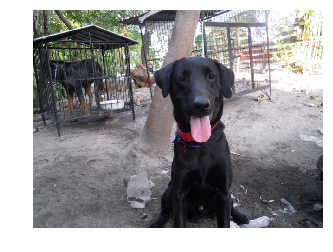

Predicted breeds and its probabilities:

Labrador retriever
94.04%
Flat-coated retriever
1.80%
Cane corso
1.68%




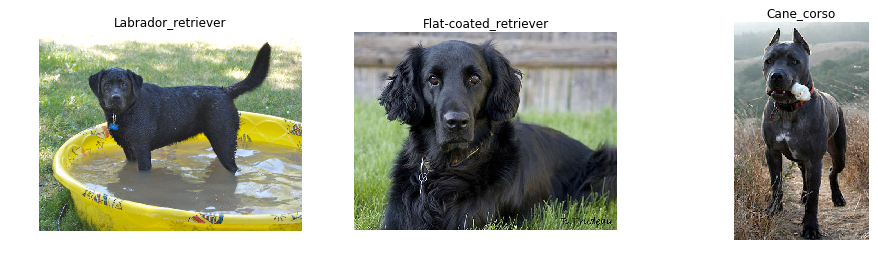



It's a dog!


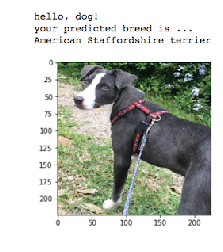

Predicted breeds and its probabilities:

American staffordshire terrier
51.66%
Parson russell terrier
8.33%
Italian greyhound
6.17%




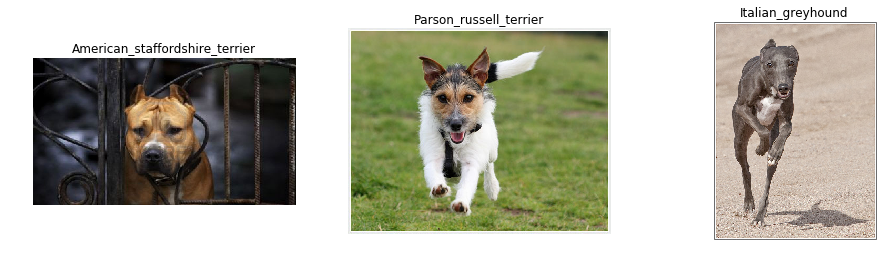



It's a dog!


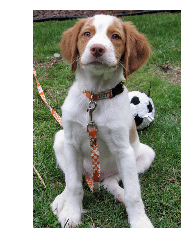

Predicted breeds and its probabilities:

Cavalier king charles spaniel
39.49%
Brittany
20.75%
Beagle
19.00%




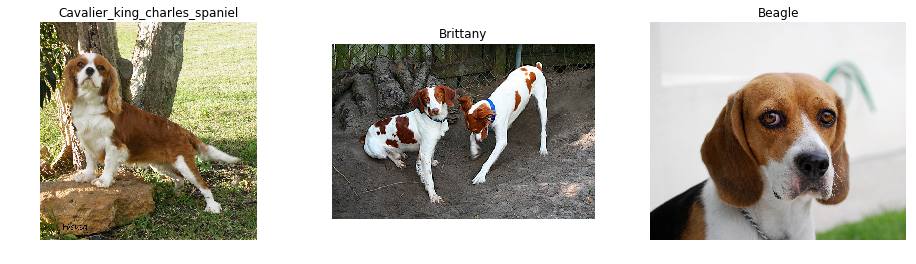



It's a human!


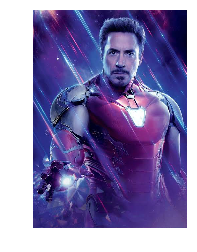

Resembled breeds and its probabilities:

Chinese crested
24.55%
Maltese
19.00%
Afghan hound
8.83%




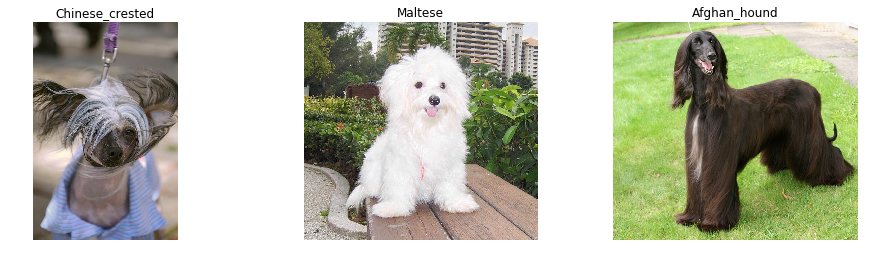



It's a human!


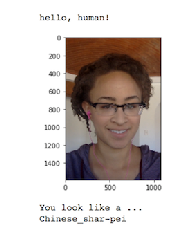

Resembled breeds and its probabilities:

Dachshund
5.07%
Bearded collie
2.88%
English toy spaniel
2.86%




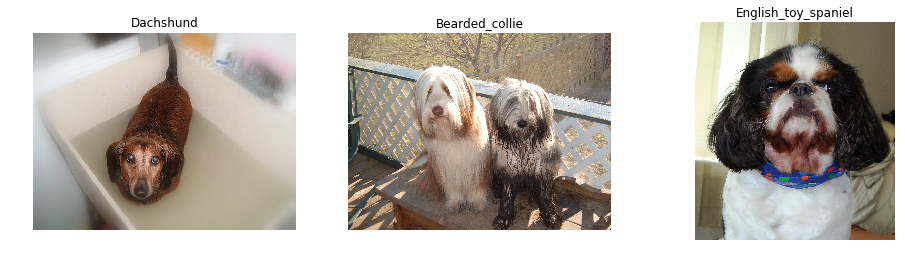



It's a dog!


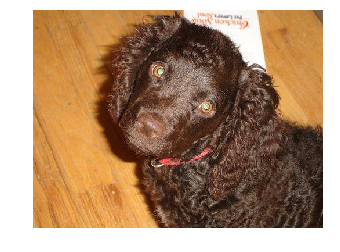

Predicted breeds and its probabilities:

Curly-coated retriever
36.28%
American water spaniel
27.74%
Boykin spaniel
18.64%




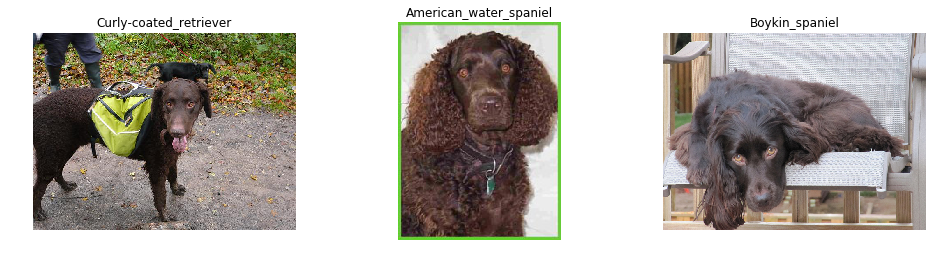



It's a human!


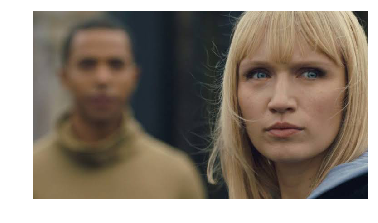

Resembled breeds and its probabilities:

Ibizan hound
4.62%
Nova scotia duck tolling retriever
4.53%
Maltese
3.67%




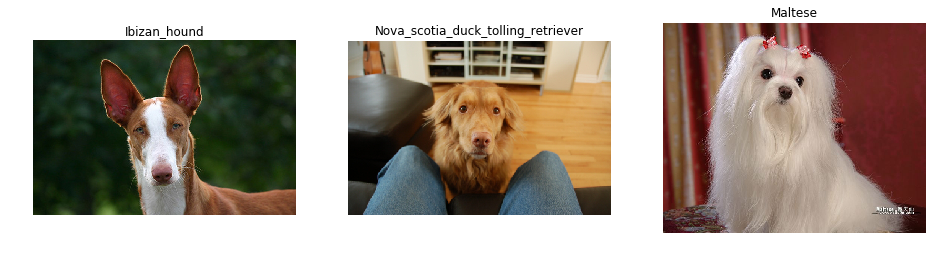



It's a dog!


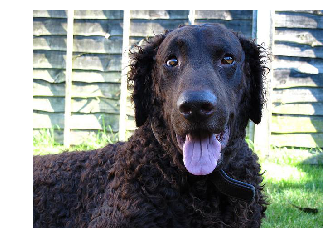

Predicted breeds and its probabilities:

Curly-coated retriever
99.99%
Portuguese water dog
0.00%
Poodle
0.00%




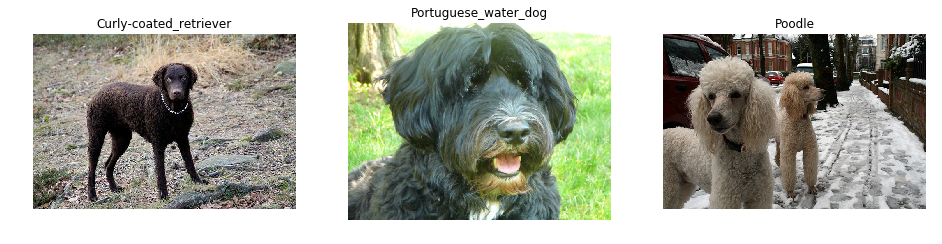



It's a dog!


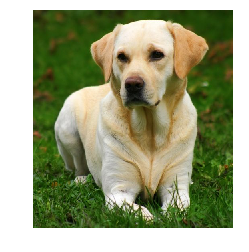

Predicted breeds and its probabilities:

Labrador retriever
80.32%
Beagle
15.76%
Bulldog
1.23%




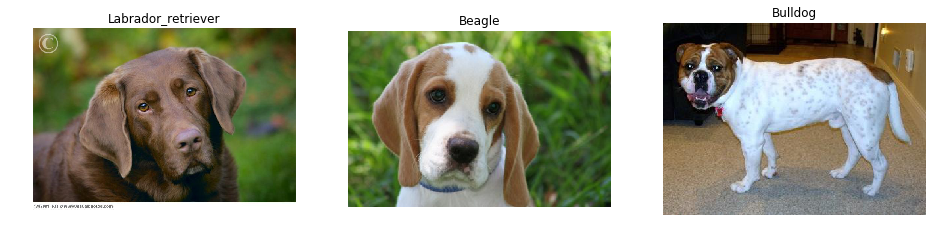



It's a dog!


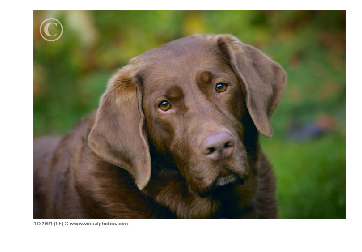

Predicted breeds and its probabilities:

Chesapeake bay retriever
87.75%
Labrador retriever
10.93%
Nova scotia duck tolling retriever
0.79%




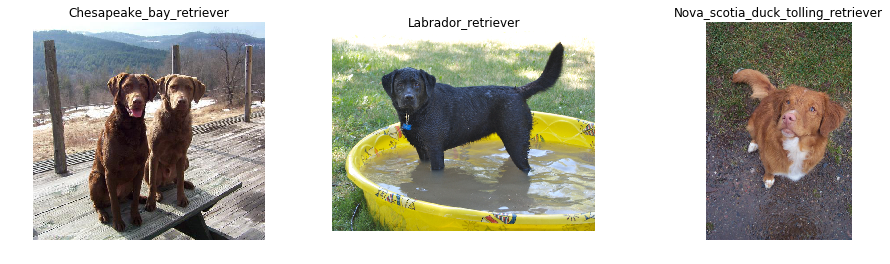



It's a dog!


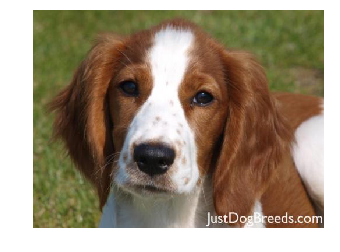

Predicted breeds and its probabilities:

Welsh springer spaniel
82.63%
Irish red and white setter
17.04%
English springer spaniel
0.21%




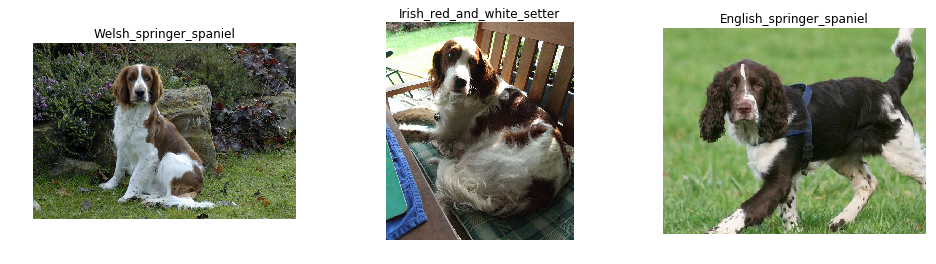



Can't tell anything


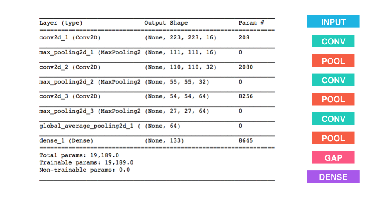

In [59]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack(files):
    run_app(file)

In [6]:
import os
import tarfile

def recursive_files(dir_name='.', ignore=None):
    for dir_name,subdirs,files in os.walk(dir_name):
        if ignore and os.path.basename(dir_name) in ignore:
            continue

        for file_name in files:
            if ignore and file_name in ignore:
                continue

            yield os.path.join(dir_name, file_name)

def make_tar_file(dir_name='.', target_file_name='workspace_archive.tar', ignore=None):
    tar = tarfile.open(target_file_name, 'w')

    for file_name in recursive_files(dir_name, ignore):
        tar.add(file_name)

    tar.close()


dir_name = '.'
target_file_name = 'workspace_archive.tar'
# List of files/directories to ignore
ignore = {'.ipynb_checkpoints', '__pycache__', target_file_name}

make_tar_file(dir_name, target_file_name, ignore)